In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import l1, l2, l1_l2
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-01-14 01:31:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-01-14 01:31:48 (149 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
vocab_size = total_words
embedding_dim = 100


In [4]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(256, activation='relu', 
                kernel_regularizer=l2(0.01)))
model.add(Dense(vocab_size, activation='softmax'))
# Pick an optimizer
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=['accuracy'])
print(model.summary())


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (N

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 7.0218 - acc: 0.0201
Epoch 2/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.5052 - acc: 0.0224
Epoch 3/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.4160 - acc: 0.0264
Epoch 4/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.3208 - acc: 0.0327
Epoch 5/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.2397 - acc: 0.0360
Epoch 6/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.1585 - acc: 0.0389
Epoch 7/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.0822 - acc: 0.0428
Epoch 8/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.0076 - acc: 0.0455
Epoch 9/100
15462/15462 [==============================] - 

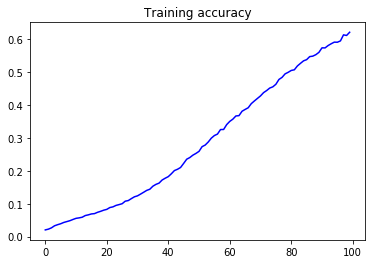

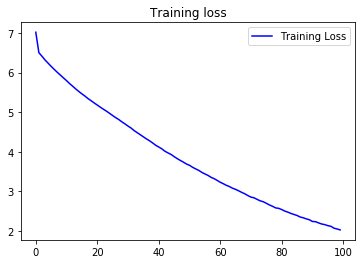

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [7]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope but these wilt have me rare they know some part thy cruel place more days days bear thee give thee words now call thee last say me alone will seen white love true too good suppose free free rare cross cross cross grow clouds to cross grow men ill express'd light be bar exceed near their faces love ' provide prove me store they know it well doth deeds still please thee hate hate gave for the chest too near slain hate hate hate hate best more mad now thought desired change me no more eyes thy heart too shame
